Problem statement:

Below a link to the JSON profiles representing fictional customers from an e-commerce company. The profiles contain information about the customer,
 their orders, their transactions, what payment methods they used and whether the customer is fraudulent or not. Your task is one of the following.

1) Tasks

 * Provide exploratory analysis of the dataset.
 * Summarise and explain the key trends in the data, providing visualisations and tabular representations as necessary.
 * Explain what factors you think are significant and insignificant in contributing to fraud
 * Construct a model to predict if a customer is fraudulent based on their profile.
 * Report on the models success and show what features are most important


In [2]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,log_loss
from collections import Counter,defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
transaction= pd.read_csv(r'D:\machine learning\major project\cust_transaction_details(1).csv')
data=pd.read_csv(r'D:\machine learning\major project\Customer_DF (1).csv')
data1=pd.read_csv(r'D:\machine learning\major project\Customer_DF (1).csv',dtype={'Fraud':int})
data2=pd.read_csv(r'D:\machine learning\major project\Customer_DF (1).csv')
data1


,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1
...,...,...,...,...,...,...,...,...,...,...
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1


total 168 rows

In [4]:
print(transaction.columns)


Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')


In [5]:
print(data1.columns)

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')


In [6]:
transaction.shape

(623, 11)

In [7]:
data1.shape

(168, 10)

In [10]:
transaction["customerEmail"].value_counts().head(168)

johnlowery@gmail.com           28
mitchellgriffith@yahoo.com     15
tmcpherson@wright.com          13
lleonard@turner-fleming.com    11
david45@gmail.com              10
                               ..
kristaavery@lewis-baird.com     1
natalie98@yahoo.com             1
aweaver@yahoo.com               1
uguzman@yahoo.com               1
victorgarcia@gmail.com          1
Name: customerEmail, Length: 136, dtype: int64

In [8]:
transaction.describe()
#top level summary

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [9]:
data.describe()
#top level summary

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


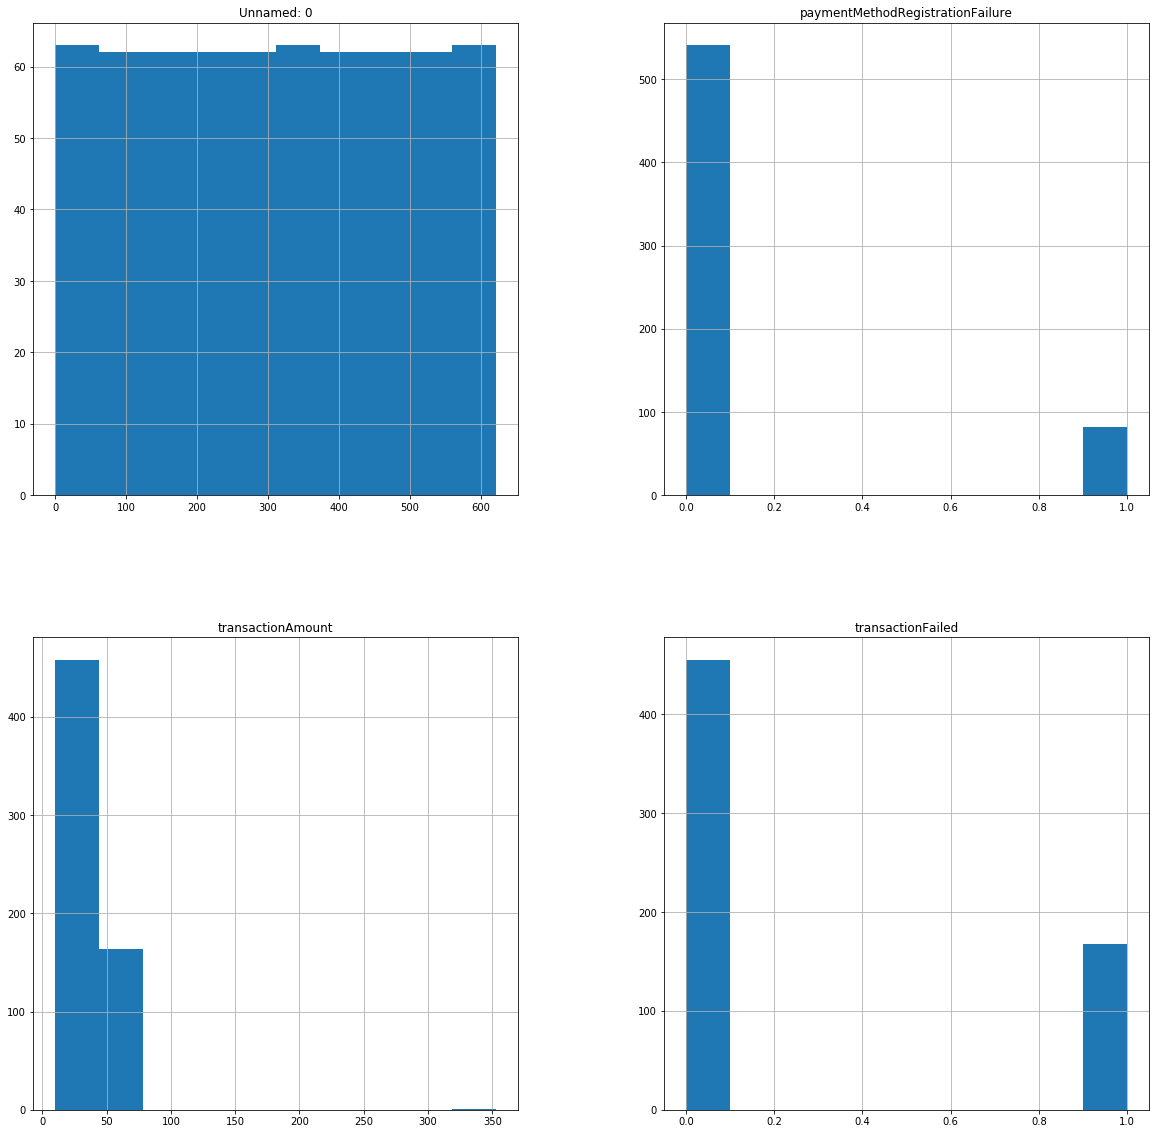

In [10]:
transaction.hist(figsize=(20,20))
plt.show()

from the above hist 
1.the payments which are failed are very then the payments which were success
2.the transactions which were failed were also less than successfull transactions
3.transaction amount was paid more by peoople who have less tha 50
     


In [11]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
Unnamed: 0                          623 non-null int64
customerEmail                       623 non-null object
transactionId                       623 non-null object
orderId                             623 non-null object
paymentMethodId                     623 non-null object
paymentMethodRegistrationFailure    623 non-null int64
paymentMethodType                   623 non-null object
paymentMethodProvider               623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null int64
orderState                          623 non-null object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
Unnamed: 0                168 non-null int64
customerEmail             168 non-null object
customerPhone             168 non-null object
customerDevice            168 non-null object
customerIPAddress         168 non-null object
customerBillingAddress    168 non-null object
No_Transactions           168 non-null int64
No_Orders                 168 non-null int64
No_Payments               168 non-null int64
Fraud                     168 non-null bool
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [13]:
data.drop('Fraud',axis=1,inplace=True) #this droping is done to avoid boolean error at histgram diagram

In [14]:
data


,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6
...,...,...,...,...,...,...,...,...,...
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6


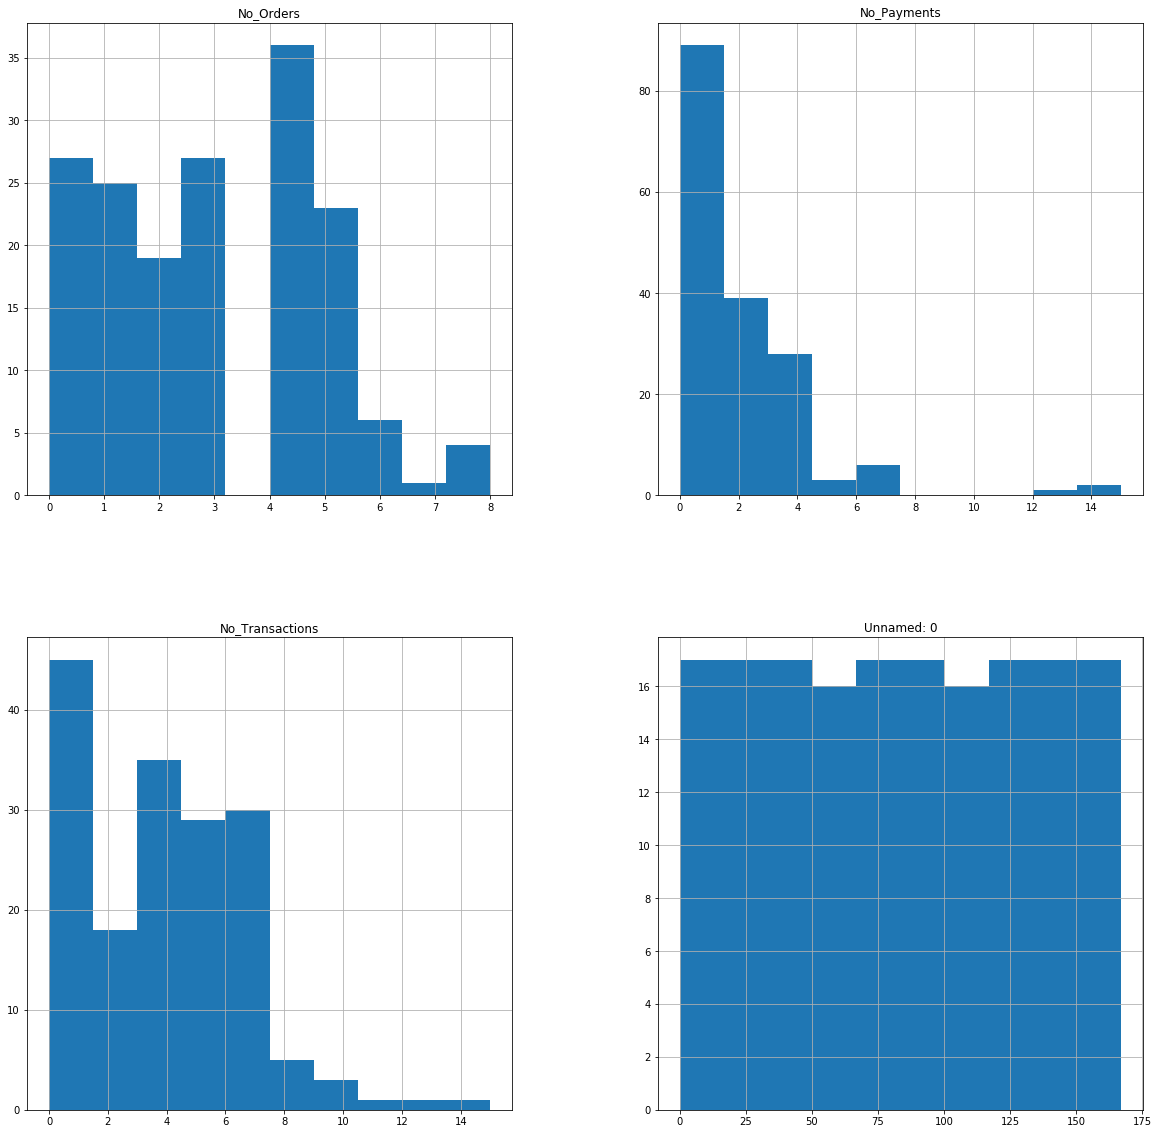

In [14]:
data.hist(figsize=(20,20))
plt.show()

In [16]:
fraud=data2[data['Fraud']==0]
valid=data2[data['Fraud']==1]
fraud

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,5,2,1,False
11,11,ksummers@hotmail.com,1-023-275-4692,2ngkzu1idwxintmxwmgn,184.97.57.11,"46383 Matthew Track Apt. 220\nRomanburgh, DC 9...",7,5,4,False
...,...,...,...,...,...,...,...,...,...,...
157,157,daniel98@lamb.com,758.182.1357x89421,lu49z4dhold8niozpl4w,d6d4:7645:ca31:dba3:42b0:c89a:d065:d67d,"6698 David Squares Apt. 540\nWestburgh, MA 77937",1,1,1,False
158,158,ujackson@harris.com,852-231-3642x738,2k850f1rbwvju71sbhqp,99.149.12.193,"664 Maurice Row Suite 634\nNew Jodi, OR 56525",5,4,2,False
159,159,brittanyhicks@jones.com,579-193-1785x676,b054slok65d4k1t01u4a,89.73.189.96,"233 Jessica Lights\nPort Sonya, SC 47511",2,1,1,False
162,162,patrickcalderon@russo.net,444-358-6570x947,84z3gd4fiabz488ybv9p,2be:a4d5:eb39:fa22:2650:83d5:917f:5f23,"6223 Cheyenne Villages Suite 751\nCoryborough,...",3,2,1,False


the number of emails which Fraud is false is 107

In [17]:
valid

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True
6,6,samuel15@saunders-rhodes.com,5045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
...,...,...,...,...,...,...,...,...,...,...
161,161,andre74@patrick-decker.com,150-073-8610,4gfo1e3xeirjanhwko92,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,"55197 Jeffrey Burgs Suite 700\nGardnerport, VA...",5,4,4,True
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


the number of emails where fraud is true is 61

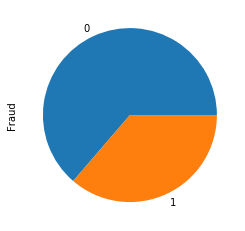

In [18]:
data1.groupby(by=['Fraud'])['Fraud'].count().plot(kind='pie')
plt.show()

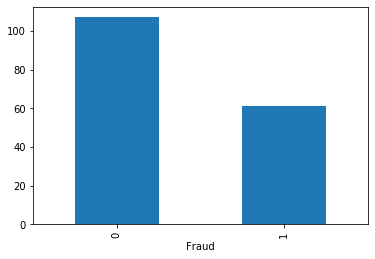

In [19]:
data1.groupby(by=['Fraud'])['Fraud'].count().plot(kind='bar')
plt.show()

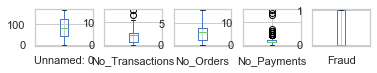

In [47]:
data1.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

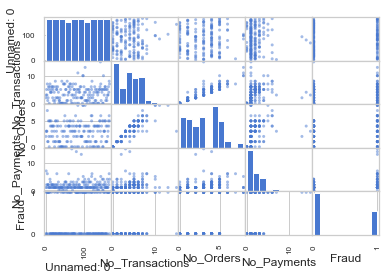

In [48]:
scatter_matrix(data1)
plt.show()

In [20]:
data2=data1.groupby('customerEmail').size()
data2

customerEmail
1yf0@jedyz63t           1
3fooiar@6eph            1
9es7t@u6n7x             1
abigail08@yahoo.com     1
alec27@bell.com         1
                       ..
ybrown@gmail.com        1
ypruitt@hotmail.com     1
zbennett@frazier.com    1
zgraham@yahoo.com       1
zthomas@gmail.com       1
Length: 161, dtype: int64

In [21]:
data3=transaction.groupby('customerEmail').size()
data3

customerEmail
1yf0@jedyz63t                 10
9es7t@u6n7x                    2
abigail08@yahoo.com            5
alec27@bell.com                6
aliciaanthony@martin.com       3
                              ..
wdelacruz@yahoo.com            4
whitedavid@jones-lloyd.org     5
ybrown@gmail.com               5
ypruitt@hotmail.com            4
zgraham@yahoo.com              5
Length: 136, dtype: int64

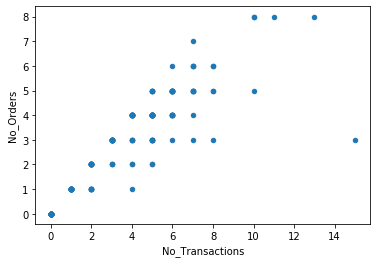

In [22]:
data.plot(kind='scatter',x='No_Transactions',y='No_Orders')
plt.show()
#from the above scatter plot we can say that the
#no of transactions is increasing as no of orders increases 

FROM THE Data sets I have observed that transactionAmount, transactionFailed, orderState from cust_transaction_details dataset and the columns like No_Transactions ,No_Orders ,No_Payments
and Fraud were useful for to say weather the customer is fraud or not
Ex:- if I take evansjeffery@yahoo.com he did 3 transactions in which 3 are orders were fullfilled tho he
his 3rd transaction is failed that means he did fraud so in the fraud column it is true.
Ex:-if we take andersonwilliam@yahoo.com he did 5 transactions in which 3 are considered as no_order
which was really correct as 1st transaction is failed it is counted as no_order
2nd transaction is transactionFailed but fullied so not counted in no_order
3rd transaction is correct so counted in no_order
4th transaction transactionFailed but fullied so not counted in no_order
5th transaction is correct so counted in no_order
so total 3 were counted in no_order which is correct hence no fraud


In [23]:
print(data1.shape)
print(len(data1.customerEmail.unique()))

(168, 10)
161


In [24]:
data1[data['customerEmail'].duplicated()]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
40,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,1
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,1
65,65,johnlowery@gmail.com,4712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,1
79,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,1
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,1
155,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,1
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1


In [25]:
data1['duplicate name']=data1['customerEmail'].apply(lambda x: 1 if (data1[data1.customerEmail==x]['customerEmail'].shape[0]>1)else 0)
data1['duplicate Ip']=data1['customerIPAddress'].apply(lambda x: 1 if (data1[data1.customerIPAddress==x]['customerIPAddress'].shape[0]>1)else 0)
data1['duplicate address']=data1['customerBillingAddress'].apply(lambda x:1 if (data1[data1.customerBillingAddress==x]['customerBillingAddress'].shape[0]>1)else 0)

In [26]:
data1.shape

(168, 13)

In [27]:
data1[data1.No_Orders==data1.No_Orders.max()]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address
84,84,lleonard@turner-fleming.com,1-414-937-7421x73705,yfpqgg5oxsn107veaala,97.111.97.42,"96103 Riley Walks\nMichellefort, ID 98085-6066",11,8,1,1,0,0,0
97,97,vmiller@hotmail.com,000-734-4774,b1tjk5s0j9ybj1qpt3ik,164.79.214.9,"PSC 9111, Box 9839\nAPO AA 57283-9646",10,8,1,1,0,0,0
98,98,david45@gmail.com,(508)223-3834,l6qv05oe0h0j78kx84ex,9d8d:535b:36fc:8773:bec0:8fa5:3206:4cb5,"5360 Adams Falls Suite 829\nHensleymouth, WV 8...",10,8,5,1,0,0,0
103,103,tmcpherson@wright.com,1-804-264-1481x08539,ui77ukzr5lnqpajdk03u,296d:59fe:a919:21ac:16dd:96f5:10b3:4f83,"7956 Alex Avenue Apt. 593\nPort Michael, OK 41350",13,8,1,1,0,0,0


In [28]:
data1[data1.No_Payments==data1.No_Payments.max()]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address
68,68,cathy42@gibson.com,754.248.6239x43965,c3r2qzqwc9anp6utob7n,7493:ab04:47ff:3a14:67d6:a128:a5b6:1500,"046 Carson Crescent\nSouth Jacksonview, NV 228...",3,3,15,1,0,0,0


In [29]:
data1['fraud_Decoded']=data1['Fraud'].apply(lambda x: 1 if x else 0)

In [30]:
data1

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address,fraud_Decoded
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,0,0,1
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,0,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,0,0,0,1
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,0,0,0,1
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,1,0,0,1
166,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,1,0,0,0,1


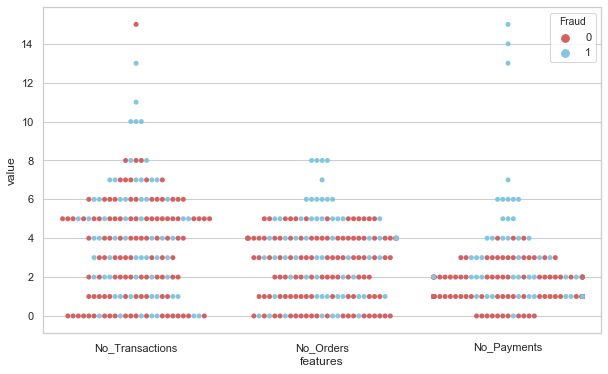

In [31]:
sns.set(style="whitegrid",palette="muted")
d=pd.melt(data1[['No_Transactions','No_Orders','No_Payments','Fraud']],"Fraud",var_name="features")
plt.figure(figsize=(10,6))
sns.swarmplot(x="features",y="value",hue="Fraud",palette=["r","c","y"],data=d)

from the above plot we can observe that if the no_transaction increases the fraud also increases
      2. if the no_orders features increases the fraud also increases
      3.if no_payments increases the fraud increases 

In [32]:
print('average no payments',round(data1.No_Payments.mean()))
print('average no transactions',round(data1.No_Transactions.mean()))


average no payments 2
average no transactions 4


In [37]:
x=data1[['No_Transactions','No_Orders','No_Payments']].values
y=data1.fraud_Decoded.values

In [38]:
transaction.customerEmail.unique().shape#out of 161 only 136 made atleast one transaction and payment

(136,)

In [39]:
data1[data1.No_Payments==0]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address,fraud_Decoded
34,34,zbennett@frazier.com,995.449.5115x498,zxdd5co6f5pylq9it4x0,e03d:db6e:f5ca:b9cd:d64f:80fe:6177:26e1,89773 Peterson Course Suite 625\nEast Amandabo...,0,0,0,0,0,0,0,0
38,38,xwang@white.com,592.309.4963x427,1qj6z7funp3l28ym8trh,7891:9f08:9ac6:c816:7c58:26cd:ff2c:7ddc,"139 Ramirez Island Suite 885\nNew Joan, MT 69993",0,0,0,0,0,0,0,0
44,44,gsimpson@cox.org,+23(4)1428642270,nf0i429dh2h2fmf287ec,20.34.8.37,"32514 Freeman Court\nPort Waltermouth, SC 34012",0,0,0,0,0,0,0,0
47,47,johnsonjennifer@yahoo.com,1-670-969-5075x27186,yqt388sj7f142rohzukc,172.191.99.44,"6395 Christopher Lakes Suite 062\nSouth Dana, ...",0,0,0,0,0,0,0,0
54,54,zthomas@gmail.com,731.957.1783x62296,7p70n6q6zbgfhiqqqsxy,ad37:7b02:70fb:4b74:bc77:cd13:1bed:2483,"01494 Anderson Corners Suite 314\nDaviston, SC...",0,0,0,0,0,0,0,0
70,70,brockmatthew@hotmail.com,800.814.4655x012,132m3ourosp5a28ksvou,188.74.171.130,"08645 Alvarado Way Suite 514\nMillerfurt, AL 8...",0,0,0,0,0,0,0,0
125,125,wbeltran@ramirez-shaffer.com,1-627-545-5097x7356,z0uxvp8sio7nyv7op58j,1b75:d451:c48a:12:cfc7:bc1e:d748:ee62,"4873 Perez Groves\nWest Gregoryburgh, NH 45193...",0,0,0,0,0,0,0,0
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,1,1,0,0,1
137,137,stephanie21@reyes-spencer.biz,990.862.5466x7247,r526953keh7ctxcf9lnh,96eb:8d53:678:53ba:599b:5db6:3fe3:3218,"31068 Vance Forks Suite 516\nNew Christopher, ...",0,0,0,0,0,0,0,0
139,139,bhorne@fuller-nelson.com,1-512-954-5541,dgfa5pe2t45d1u6ox33l,118e:7887:94b6:b2a7:d2ad:8f35:c241:3149,"25653 Key Gateway\nPort Robert, PA 64370",0,0,0,0,0,0,0,0


In [61]:
x_test

,No_Transactions,No_Orders,No_Payments,Fraud
0,2,2,1,0
1,3,3,7,1
2,5,3,2,0
3,3,3,1,0
4,7,7,6,1
...,...,...,...,...
163,3,3,1,1
164,6,5,3,1
165,4,4,2,1
166,8,6,6,1


In [56]:
y_train

,Fraud
0,0
1,1
2,0
3,0
4,1
...,...
163,1
164,1
165,1
166,1


In [63]:
x_train

array([[-0.6116095 , -0.42774965, -0.4915725 ],
       [-0.25359418,  0.07832036,  2.35615783],
       [ 0.46243645,  0.07832036, -0.01695078],
       [-0.25359418,  0.07832036, -0.4915725 ],
       [ 1.17846709,  2.1026004 ,  1.88153611],
       [-0.96962482, -0.93381966, -0.01695078],
       [-0.6116095 , -0.93381966, -0.01695078],
       [ 0.82045177,  1.09046038, -0.01695078],
       [ 0.46243645, -0.42774965, -0.4915725 ],
       [-1.32764014, -1.43988968, -0.4915725 ],
       [ 0.82045177,  1.09046038, -0.4915725 ],
       [ 1.17846709,  1.09046038,  0.93229267],
       [ 0.10442113,  0.58439037,  0.45767095],
       [ 0.10442113, -0.42774965, -0.4915725 ],
       [ 0.46243645,  1.09046038, -0.01695078],
       [ 0.10442113,  0.58439037, -0.4915725 ],
       [ 0.82045177,  0.07832036, -0.01695078],
       [ 0.82045177,  0.58439037, -0.01695078],
       [-0.6116095 , -0.42774965, -0.4915725 ],
       [ 0.46243645,  0.58439037, -0.01695078],
       [-0.96962482, -0.93381966, -0.491

In [30]:
from sklearn.preprocessing import StandardScaler
X_train=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress','Fraud'],axis=1)
Y_train=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress','No_Transactions','No_Orders','No_Payments'],axis=1)
X_test=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress'],axis=1)
scaler=StandardScaler()
X_train=scaler.fit_transform(Y_train)
X_test = scaler.transform(X_test)

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

In [32]:
models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]

In [39]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [190]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,C=C,class_weight=class_weight,solver=solver)

grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s


Best Score:  1.0
Best Params:  {'C': 0.0001, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    7.0s finished


In [40]:
ogistic = linear_model.LogisticRegression(C=1, class_weight={1:0.6, 0:0.4}, penalty='l1', solver='liblinear')
get_cv_scores(logistic)

CV Mean:  1.0
STD:  0.0




In [208]:
x_train.mean()

3.022792022792023

In [41]:
data1[data1.fraud_Decoded==1]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address,fraud_Decoded
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,0,0,0,1
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1,0,0,0,1
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,1,0,0,0,1
6,6,samuel15@saunders-rhodes.com,5045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,1,0,0,0,1
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,andre74@patrick-decker.com,150-073-8610,4gfo1e3xeirjanhwko92,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,"55197 Jeffrey Burgs Suite 700\nGardnerport, VA...",5,4,4,1,0,0,0,1
163,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,1,0,0,0,1
164,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,1,0,0,0,1
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,1,1,0,0,1


In [50]:
y_train

,fraud_Decoded
81,0
148,0
93,1
167,0
94,0
...,...
45,1
33,0
136,1
86,0


In [9]:
data1.customerEmail.unique().shape

(161,)

In [175]:
y_train.shape

(117,)

In [202]:
x_test.mean()

2.496732026143791

In [ ]:
x

In [49]:
x_train

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,duplicate name,duplicate Ip,duplicate address
81,81,rbolton@hotmail.com,4454448537,znuylfikiuid1orrwsvt,911e:44d8:824c:85a3:ba7a:6513:8d40:c4c3,"150 Kenneth Bypass Apt. 791\nKevinton, VT 92488",5,4,3,0,0,0,0
148,148,mercedesfinley@roman.org,569-710-0646x4095,qh7i8ad23hd5vosiuj5j,f15:32d4:97fb:c211:3d4e:a471:af9c:6c34,"03028 Brown Spring Suite 348\nElliottchester, ...",5,5,4,0,0,0,0
93,93,craig83@rasmussen-alvarado.com,122-259-7479x336,s93o0wj3eqd9whcy9ng3,35.212.254.226,"10068 Adam Rapids Suite 792\nRileyburgh, GA 11372",2,2,13,1,0,0,0
167,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,0,0,0
94,94,thernandez@johnson-quinn.com,(940)148-2704,y2n05wrk1bg8w21bey0t,1f62:a7f0:6db0:caee:9b6a:eafd:dfea:c50,"911 Miller Summit Suite 426\nPort Ashley, IA 0...",2,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,1,1,0,0
33,33,ypruitt@hotmail.com,804-331-7488x82163,dmqmkcujj3k31g0kr9b4,224.3.233.30,"437 Jean Well\nAndrewville, FM 13796",4,4,3,0,0,0,0
136,136,aliciaanthony@martin.com,+77(2)4526373005,9iac2it77dm615ucymx3,110.221.131.62,"265 Marisa Keys\nLynchmouth, WV 63252-7526",3,3,1,1,0,0,0
86,86,grace99@wright.com,257-706-1003x92053,1rqqqzad6b2grmhvktxf,3c3d:d324:e445:35c:4d73:936a:e1bb:ce99,"88469 Rebecca Land\nWest Kyleborough, DC 15715...",0,0,1,0,0,0,0


In [34]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [40]:
array=data1.values
x = array[:,-1]
y=array[:,7:10]

In [41]:
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.2, random_state=1)

In [42]:
from sklearn.preprocessing import StandardScaler
X_train=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress'],axis=1)
Y_train=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress','No_Transactions','No_Orders','No_Payments'],axis=1)
X_test=data1.drop(['Unnamed: 0','customerEmail','customerPhone','customerDevice','customerIPAddress','customerBillingAddress'],axis=1)


In [43]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 1.000000 (0.000000)
LDA: 0.688113 (0.104835)


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was

KNN: 0.868301 (0.092623)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.993750 (0.018750)


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

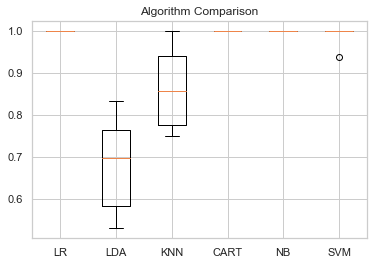

In [44]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

from the above we came to know that svm 0.993750 (0.018750) is the best to do predictions and  do testing

In [42]:
def tuning(model,parameters,parameter_name,train_data_x,train_data_y,plot_values,is_xgb=False):
    grid=GridSearchCV(model,parameters,cv=3,scoring='f1_macro')
   
    
    
    results=pd.DataFrame(grid.cv_results_)
    params=result['params']
    score_tr_array=results['mean_train_score']
    score_cv_array=results['mean_test_score']
    for i in range(len(params)):
        print("For",params[i],"acc of Train data is",score_tr_array[i],"and acc of CV data is",score_cv_arra[i])
        
    print('Best parameter is',grid.best_params)
    print('Best F1 score is',grid.best_score_)
    if not is_xgb:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy','CV Accuracy'])
        plt.show()
    return grid.best_params_

In [160]:
model=LogisticRegression()
alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas={'C': alpha}
best_params_= tuning(model, alphas, 'C',x_train,y_train,alpha,0)

best_alpha=best_params['C']
clf=LogisticRegression(C= best_alpha).fit(x_train,y_train)
y_pred= clf.predict(x_test)
y_pred_proba=clf.predict_proba(x_test)
acc=accuracy_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred,average='macro')
loss=log_loss(y_test,y_pred_proba)
print(acc)
print(f1_score)
print(loss0)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWar

KeyError: 'mean_data3_score'